In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math

# Just for visualisation of whole output reading
# Save the datafile onto a directory accessible to your Colab session
# Insert the .txt datafile path into read_csv('~') path argument

# NB: Finger mapping may vary.
# In this case we used the mapping: Fingers 1: Index, 2: Thumb, 3: Pinky

finger1_data = pd.read_csv('/content/LAB_1Channel.txt', sep='\t')

finger2_data = pd.read_csv('/content/1Channel_Direct.txt', sep='\t')

finger3_data = pd.read_csv('/content/1Channel_Wire.txt', sep='\t')

finger1_data



,Timestamp [us],A_X [LSB],A_Y [LSB],A_Z [LSB],A_X [mg],A_Y [mg],A_Z [mg],QVAR [LSB],FSM_STATUS,FSM_OUTS1,FSM_OUTS2,FSM_OUTS3,FSM_OUTS4,Unnamed: 13
0,802,-272,512,15968,-16.592,31.232,974.048,-336,0,80,0,0,0,NaN
1,5759,-144,432,15968,-8.784,26.352,974.048,-384,0,80,0,0,0,NaN
2,10715,-240,560,15904,-14.640,34.160,970.144,-576,0,80,0,0,0,NaN
3,15670,-224,448,15904,-13.664,27.328,970.144,-432,0,80,0,0,0,NaN
4,20625,-224,496,15920,-13.664,30.256,971.120,-448,0,80,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,14691677,-224,384,15936,-13.664,23.424,972.096,-320,0,80,0,0,0,NaN
2966,14696630,-288,448,15952,-17.568,27.328,973.072,-464,0,80,0,0,0,NaN
2967,14701587,-288,400,15968,-17.568,24.400,974.048,-592,0,80,0,0,0,NaN
2968,14706542,-336,416,15920,-20.496,25.376,971.120,-352,0,80,0,0,0,NaN


#QVar data

In [ ]:
times_microseconds1 = finger1_data['Timestamp [us]'].tolist()
times_microseconds2 = finger2_data['Timestamp [us]'].tolist()
times_microseconds3 = finger3_data['Timestamp [us]'].tolist()

# Perform comparative analysis of datasets from 3 fingers; take the longest timing as our timing data.
# Unlikely for all datasets to have the same length? (hopefully)

if len(times_microseconds1) > len(times_microseconds2) and len(times_microseconds1) > len(times_microseconds3):
  times_microseconds = times_microseconds1
elif len(times_microseconds2) > len(times_microseconds1) and len(times_microseconds2) > len(times_microseconds3):
  times_microseconds = times_microseconds2
elif len(times_microseconds3) > len(times_microseconds1) and len(times_microseconds2) > len(times_microseconds3):
  times_microseconds = times_microseconds3
else:
  times_microseconds = times_microseconds1

# Take the longest timing from the 3 datasets as our single x-axis/time-axis

times_seconds = [i*10**(-6) for i in times_microseconds] # Original data was in microseconds, might be useful to redefine in seconds

qvar_values1 = finger1_data['QVAR [LSB]'].tolist()
qvar_values2 = finger2_data['QVAR [LSB]'].tolist()
qvar_values3 = finger3_data['QVAR [LSB]'].tolist()

ax_values1 = finger1_data['A_X [LSB]'].tolist()
ax_values2 = finger2_data['A_X [LSB]'].tolist()
ax_values3 = finger3_data['A_X [LSB]'].tolist()

# center qvar data on y-axis
def CenterData(qvar_values):
  avg_qvar = sum(qvar_values[0:100])/len(qvar_values[0:100])
  index = 0
  for i in qvar_values:
    index = index + 1
    qvar_values[index-1] = i - avg_qvar

  return qvar_values

# normalize qvar data
def NormalizeData(qvar_values):
  index = 0
  for i in qvar_values:
    index = index + 1
    qvar_values[index-1] = (i - min(qvar_values)) / (max(qvar_values) - min(qvar_values))

  return qvar_values

################
# Implement Functions
# qvar_values1 = NormalizeData(qvar_values1)
# qvar_values2 = NormalizeData(qvar_values2)
# qvar_values3 = NormalizeData(qvar_values3)

qvar_values1 = CenterData(qvar_values1)
qvar_values2 = CenterData(qvar_values2)
qvar_values3 = CenterData(qvar_values3)
################

Let's individually plot each dataset from each finger individually. The issue of data synchronisation and data fusion has to be considered if we want to plot all three channels concurrently on the same plot (given that each channel starts data recording at different times).

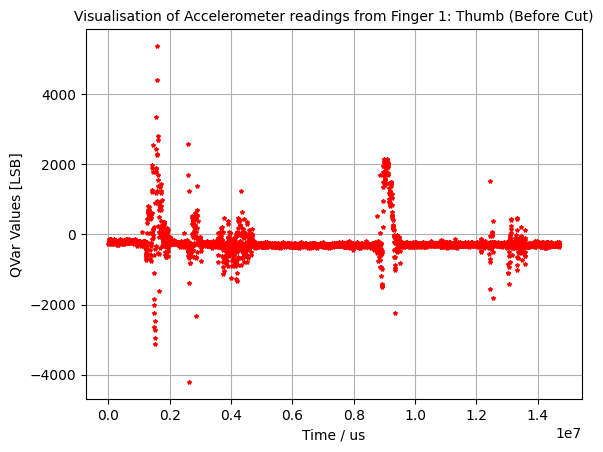

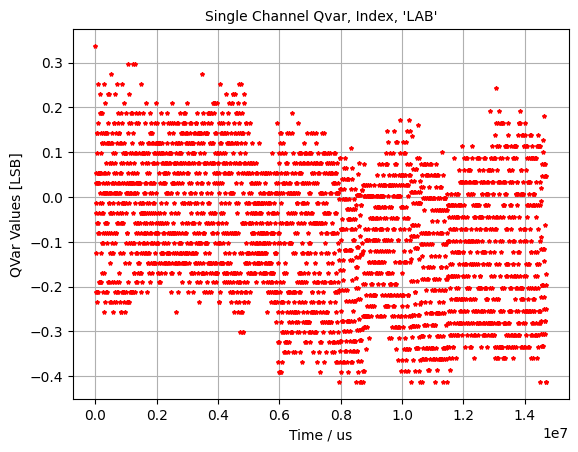

In [ ]:
# plot accelerometer readings
plt.plot(times_microseconds1, ax_values1, color = 'r', linestyle = 'None',
         marker = '*', markersize = 3, label = "Finger 1")

plt.xlabel('Time / us')
plt.ylabel('QVar Values [LSB]')
plt.title("Visualisation of Accelerometer readings from Finger 1: Thumb (Before Cut)", fontsize = 10)
plt.grid()
plt.show()


# cut all data before synchronization event
index = 0
tol = 1000
for i in ax_values1:
  index = index + 1
  if i > tol:
    times_microseconds1 = times_microseconds1[0:len(times_microseconds1)-index]
    qvar_values1 = qvar_values1[index:len(qvar_values1)]
    ax_values1 = ax_values1[index:len(ax_values1)]
    break

plt.plot(times_microseconds1, qvar_values1, color = 'r', linestyle = 'None',
         marker = '*', markersize = 3, label = "Finger 1")
plt.xlabel('Time / us')
plt.ylabel('QVar Values [LSB]')
plt.title("Visualisation of QVar readings from Finger 1: Thumb (Index if 7/19)", fontsize = 10)
plt.grid()
# plt.ylim(-0.1,0.1)
plt.show()

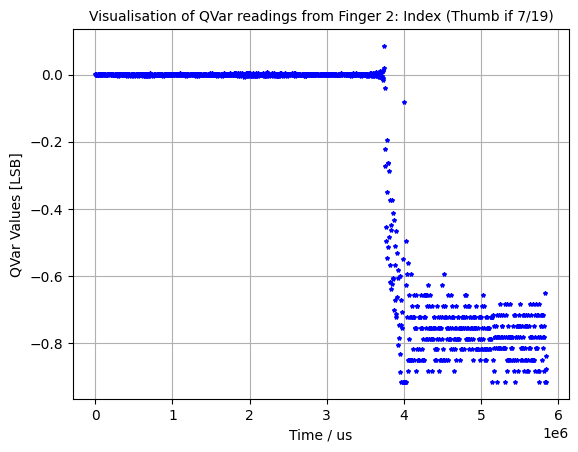

In [ ]:
# cut all data before synchronization event
index = 0
tol = 1000
for i in ax_values2:
  index = index + 1
  if i > tol:
    times_microseconds2 = times_microseconds2[0:len(times_microseconds2)-index]
    qvar_values2 = qvar_values2[index:len(qvar_values2)]
    ax_values2 = ax_values2[index:len(ax_values2)]
    break

plt.plot(times_microseconds2, qvar_values2, color = 'b', linestyle = 'None',
         marker = '*', markersize = 3, label = "Finger 2")

plt.xlabel('Time / us')
plt.ylabel('QVar Values [LSB]')
plt.title("Visualisation of QVar readings from Finger 2: Index (Thumb if 7/19)", fontsize = 10)
# plt.ylim(-3000,3000)
# plt.xlim(1e7,3e7)
plt.grid()
plt.show()



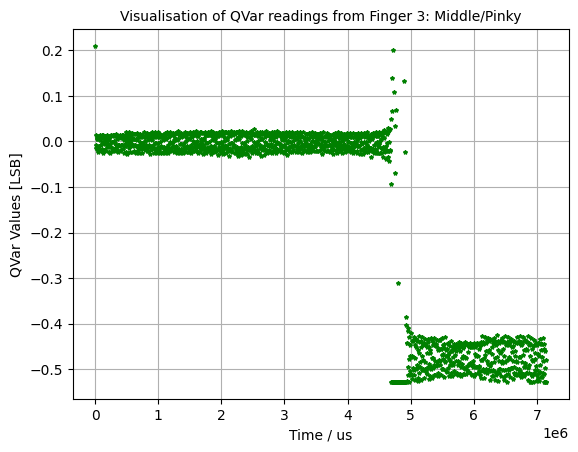

In [ ]:
# cut all data before synchronization event
index = 0
tol = 1000
for i in ax_values3:
  index = index + 1
  if i > tol:
    times_microseconds3 = times_microseconds3[0:len(times_microseconds3)-index]
    qvar_values3 = qvar_values3[index:len(qvar_values3)]
    ax_values3 = ax_values3[index:len(ax_values3)]
    break

plt.plot(times_microseconds3, qvar_values3, color = 'g', linestyle = 'None',
         marker = '*', markersize = 3, label = "Finger 3")

plt.xlabel('Time / us')
plt.ylabel('QVar Values [LSB]')
plt.title("Visualisation of QVar readings from Finger 3: Middle/Pinky", fontsize = 10)
plt.grid()
plt.show()



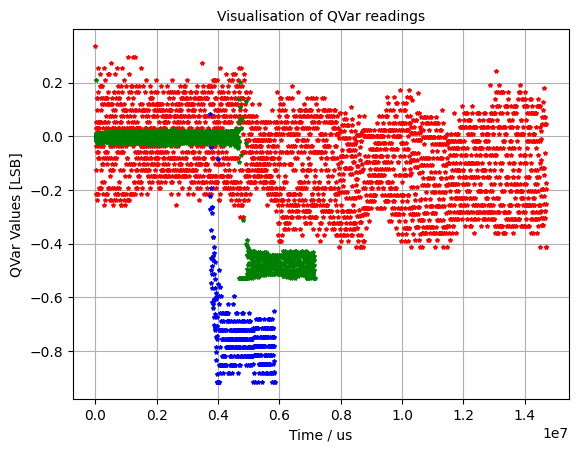

In [ ]:
plt.plot(times_microseconds1, qvar_values1, color = 'r', linestyle = 'None',
         marker = '*', markersize = 3, label = "Concurrent Visualisation of 3 different QVar readings")

plt.plot(times_microseconds2, qvar_values2, color = 'b', linestyle = 'None',
         marker = '*', markersize = 3, label = "Concurrent Visualisation of 3 different QVar readings")

plt.plot(times_microseconds3, qvar_values3, color = 'g', linestyle = 'None',
         marker = '*', markersize = 3, label = "Concurrent Visualisation of 3 different QVar readings")

plt.xlabel('Time / us')
plt.ylabel('QVar Values [LSB]')
plt.title("Visualisation of QVar readings", fontsize = 10)
plt.grid()
plt.show()

**NEED TO SYNC MULTIPLE DATA CHANNELS USING ACCELERATION SPIKE FROM XYZ ACCELERATION DATA!!!!!!!!**

**Comments on Preliminary Visualisation of Data:**

Default ambient value for the QVar sensor ('No Touch') is 0. The "Long Touch" sequences are most obvious, hitting a floor value of -32768 for the QVar readings. The individual quick touches "Touch 1", "Touch 2", "Touch 3" spikes are also discernible in the pattern, but need better visualisation to differentiate the pattern.

**N.B** We need a way of visualising a large amount of datapoints better, as there are too many datapoints and may swamp out individual spikes/patterns in the signal readings. Play around more with plotting parameters, functions.